## Load packages

In [1]:
from torch.utils.data import DataLoader
from warnings import simplefilter
import matplotlib.pyplot as plt
from dataloader import *
from Trainer import *
import pandas as pd
import numpy as np
from ANN_Models import *
import torch

simplefilter(action='ignore', category=pd.errors.ParserWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=FutureWarning)

## Non-Linear

In [2]:
data = DATA(na=0, nb=15) # Takes +- 15 seconds to load the data due to size of input for Xtrain and Ytrain
Xtrain, Ytrain = data.Xtrain, data.Ytrain

# Load data and set them up correctly for dataloader
Dataset_train, Dataset_val, Dataset_test = CustomDataset(Xtrain.to_numpy(), Ytrain.to_numpy()).split_data([0.8, 0.199, 0.001])
dl_train = DataLoader(Dataset_train, batch_size=32, shuffle=True)
dl_val = DataLoader(Dataset_val, batch_size=32, shuffle=True)
dl_test = DataLoader(Dataset_test, batch_size=32, shuffle=True)

In [3]:
model = NonLinear(5)

# Show model summary
model

NonLinear(
  (fc1): Sequential(
    (0): LazyLinear(in_features=0, out_features=5, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [4]:
train_module = Trainer(model, dl_train, dl_val, dl_test, 'savefolderpytorch\\Non-Linear')

The device that will be used in training is Quadro P1000


In [5]:
train_module.fit(epochs=10, batch_size=32)
train_module.save_model()

Epoch 1


Validation: 100%|██████████| 498/498 [00:01<00:00, 384.26it/s, loss=0.0682]

Validation loss is 0.0002426061829821623
Epoch 2



Validation: 100%|██████████| 498/498 [00:01<00:00, 274.68it/s, loss=0.0534]


Validation loss is 0.00024042521157864935
Epoch 3


Validation: 100%|██████████| 498/498 [00:01<00:00, 372.45it/s, loss=0.151] 

Validation loss is 0.00024106253136907537
Epoch 4



Validation: 100%|██████████| 498/498 [00:01<00:00, 358.01it/s, loss=0.0742]

Validation loss is 0.00024085903527605883
Epoch 5



Validation: 100%|██████████| 498/498 [00:01<00:00, 315.19it/s, loss=0.108] 

Validation loss is 0.00024011721373543127
Epoch 6



Validation: 100%|██████████| 498/498 [00:01<00:00, 349.97it/s, loss=0.0439]


Validation loss is 0.00024069926123369435
Epoch 7


Validation: 100%|██████████| 498/498 [00:01<00:00, 313.41it/s, loss=0.124] 

Validation loss is 0.0002408158667074942
Epoch 8



Validation: 100%|██████████| 498/498 [00:01<00:00, 299.10it/s, loss=0.178] 

Validation loss is 0.0002406063609619402
Epoch 9



Validation: 100%|██████████| 498/498 [00:01<00:00, 397.45it/s, loss=0.0857]

Validation loss is 0.00024074242781947517
Epoch 10



Validation: 100%|██████████| 498/498 [00:01<00:00, 392.28it/s, loss=0.0926]


Validation loss is 0.00024095677287941473


Overall conclusion not a great model but it works, Error does not seem to drop below 0.024% with 15 inputs

## ANN

In [6]:
data = DATA(15, 15) # Takes +- 15 seconds to load the data due to size of input for Xtrain and Ytrain
Xtrain, Ytrain = data.Xtrain, data.Ytrain

# Load data and set them up correctly for dataloader
Dataset_train, Dataset_val, Dataset_test = CustomDataset(Xtrain.to_numpy(), Ytrain.to_numpy()).split_data([0.8, 0.199, 0.001])
dl_train = DataLoader(Dataset_train, batch_size=32, shuffle=True)
dl_val = DataLoader(Dataset_val, batch_size=32, shuffle=True)
dl_test = DataLoader(Dataset_test, batch_size=32, shuffle=True)

In [7]:
model = NARX(5)

# Show model summary
model

NARX(
  (fc1): Sequential(
    (0): LazyLinear(in_features=0, out_features=5, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [8]:
train_module = Trainer(model, dl_train, dl_val, dl_test, DIR='savefolderpytorch\\NARX')

The device that will be used in training is Quadro P1000


In [9]:
train_module.fit(epochs=10, batch_size=32)
train_module.save_model()

Epoch 1


Validation: 100%|██████████| 498/498 [00:01<00:00, 346.80it/s, loss=0.00621] 

Validation loss is 5.333528768564562e-06
Epoch 2



Validation: 100%|██████████| 498/498 [00:01<00:00, 304.58it/s, loss=0.00143] 

Validation loss is 2.0871289771008938e-06
Epoch 3



Validation: 100%|██████████| 498/498 [00:01<00:00, 307.97it/s, loss=0.000192]

Validation loss is 1.293368217354797e-06
Epoch 4



Validation: 100%|██████████| 498/498 [00:01<00:00, 307.36it/s, loss=0.000216]

Validation loss is 8.860305285412926e-07
Epoch 5



Validation: 100%|██████████| 498/498 [00:01<00:00, 307.98it/s, loss=0.000131]

Validation loss is 5.65008255628045e-07
Epoch 6



Validation: 100%|██████████| 498/498 [00:01<00:00, 310.09it/s, loss=0.000349]

Validation loss is 4.139786670519877e-07
Epoch 7



Validation: 100%|██████████| 498/498 [00:01<00:00, 367.53it/s, loss=5.9e-5]  

Validation loss is 3.4423072102834387e-07
Epoch 8



Validation: 100%|██████████| 498/498 [00:01<00:00, 304.39it/s, loss=0.000222]

Validation loss is 3.169140396659711e-07
Epoch 9



Validation: 100%|██████████| 498/498 [00:01<00:00, 356.73it/s, loss=9.15e-5] 

Validation loss is 2.7298452385633257e-07
Epoch 10



Validation: 100%|██████████| 498/498 [00:01<00:00, 358.39it/s, loss=0.000118]


Validation loss is 4.737924390009886e-07


Multiple model training and testing

In [10]:
# Test appropriate model outfeatures
# for i in range(1, 11):
#     model = NARX(i)
#     model.name = f'ANN_{i}'
#     train_module = Trainer(model, dl_train, dl_val, dl_test)
#     train_module.fit(epochs=5, batch_size=64) # Increase batch size to 64
#     train_module.save_model()

In [11]:
# for i in range(1, 11):
#     res1 = zip(pd.read_csv(f'savefolderpytorch\\train_ANN_{i}.csv').groupby('epoch').mean()['loss'], pd.read_csv(f'savefolderpytorch\\val_ANN_{i}.csv')['loss'])
#     list_object = np.empty(shape=(5, 2))
#     for j in range(5):
#         list_object[j,:] = next(res1)
#     list_object

#     x = np.linspace(1, 5, 5)
#     train = list_object[:,0]
#     val = list_object[:,1]
#     plt.semilogy(x, train, label='train')
#     plt.semilogy(x, val, label='val')
#     plt.title(f"number of hidden layers = {i}")
#     plt.legend()
#     plt.show()

## NOE

In [12]:
data = DATA(UseOE=True) # Takes +- 10 seconds to load the data due to size of input for Xtrain and Ytrain
Xtrain, Ytrain = data.Xtrain, data.Ytrain
Xtrain, Xval, Ytrain, Yval = Xtrain[71900:], Xtrain[:71900], Ytrain[71900:], Ytrain[:71900]
# Might need a different dataloader for this


# Load data and set them up correctly for dataloader
# Dataset_train, Dataset_val, Dataset_test = CustomDataset(Xtrain, Ytrain).split_data([0.8, 0.199, 0.001])
# dl_train = DataLoader(Dataset_train, batch_size=32, shuffle=True)
# dl_val = DataLoader(Dataset_val, batch_size=32, shuffle=True)
# dl_test = DataLoader(Dataset_test, batch_size=32, shuffle=True)

In [13]:
model = RNN(hidden_size=15)

# Show model summary
model

RNN(
  (H2H): Sequential(
    (0): Linear(in_features=16, out_features=40, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=40, out_features=15, bias=True)
  )
  (H2O): Sequential(
    (0): Linear(in_features=16, out_features=40, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=40, out_features=1, bias=True)
  )
)

In [14]:
# train_module = Trainer(model, dl_train, dl_val, dl_test, DIR='savefolderpytorch\\NOE')

In [15]:
# train_module.fit(epochs=10, batch_size=32)
# train_module.save_model()

In [17]:
n_burn = 10
batch_size = 64

model = RNN(hidden_size=15) #d=)
optimizer = torch.optim.Adam(model.parameters()) #d=)


ids = np.arange(len(Xtrain),dtype=int) 
for epoch in range(50):
    np.random.shuffle(ids) #inspace shuffle of the ids of the trainin set to select a random subset 
    for i in range(0,len(Xtrain),batch_size):
        ids_now = ids[i:i+batch_size] #the ids of the current batch
        Uin = Xtrain[ids_now] #d)
        Y_real = Ytrain[ids_now] #d)

        Y_predict = model.forward(inputs=Uin) #d)
        residual = Y_real - Y_predict #d)
        Loss = torch.mean(residual[:,n_burn:]**2) #d)
        
        optimizer.zero_grad()  #d)
        Loss.backward()  #d)
        optimizer.step()  #d)
    
    with torch.no_grad(): #monitor
        Loss_val = torch.mean((model(inputs=Xval)[:,n_burn:] - Yval[:,n_burn:])**2)**0.5
        Loss_train = torch.mean((model(inputs=Xtrain)[:,n_burn:] - Ytrain[:,n_burn:])**2)**0.5
        print(f'epoch={epoch}, Validation NRMS={Loss_val.item():.2%}, Train NRMS={Loss_train.item():.2%}')

epoch=0, Validation NRMS=24.14%, Train NRMS=24.43%
epoch=1, Validation NRMS=24.08%, Train NRMS=23.69%
epoch=2, Validation NRMS=21.04%, Train NRMS=20.57%
epoch=3, Validation NRMS=26.62%, Train NRMS=27.16%
epoch=4, Validation NRMS=20.74%, Train NRMS=20.07%
epoch=5, Validation NRMS=20.74%, Train NRMS=20.31%
epoch=6, Validation NRMS=20.41%, Train NRMS=19.78%
epoch=7, Validation NRMS=21.44%, Train NRMS=20.84%
epoch=8, Validation NRMS=20.37%, Train NRMS=19.66%
epoch=9, Validation NRMS=21.64%, Train NRMS=21.23%
epoch=10, Validation NRMS=31.81%, Train NRMS=32.00%
epoch=11, Validation NRMS=21.05%, Train NRMS=20.45%
epoch=12, Validation NRMS=20.67%, Train NRMS=19.78%
epoch=13, Validation NRMS=21.03%, Train NRMS=20.21%
epoch=14, Validation NRMS=20.78%, Train NRMS=20.08%
epoch=15, Validation NRMS=20.66%, Train NRMS=19.89%
epoch=16, Validation NRMS=20.47%, Train NRMS=19.47%
epoch=17, Validation NRMS=20.71%, Train NRMS=19.79%
epoch=18, Validation NRMS=20.21%, Train NRMS=19.28%
epoch=19, Validation N

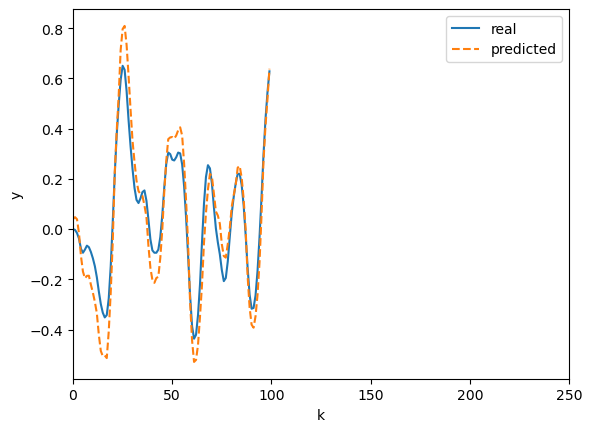

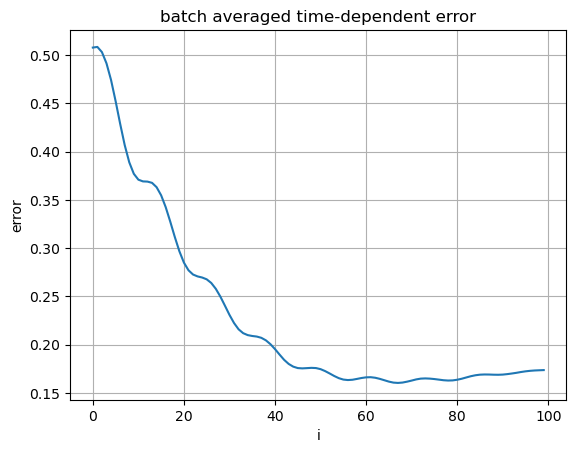

In [20]:
with torch.no_grad():
    plt.plot(Yval[0])
    plt.plot(model(inputs=Xval)[0],'--')
    plt.xlabel('k')
    plt.ylabel('y')
    plt.xlim(0,250)
    plt.legend(['real','predicted'])
    plt.show()
    plt.plot(np.mean((Ytrain-model(inputs=Xtrain)).numpy()**2,axis=0)**0.5) #average over the error in batch
    plt.title('batch averaged time-dependent error')
    plt.ylabel('error')
    plt.xlabel('i')
    plt.grid()
    plt.show()